In [1]:
# @formatter:off
%load_ext autoreload
%autoreload 2
# @formatter:on

In [2]:
import lib.ttp.problem as p
from lib.ttp import Problem, Solution

In [3]:
tour = [1, 22, 8, 26, 31, 28, 3, 36, 35, 20, 2, 29, 21, 16, 50, 34, 30, 9, 49, 10, 39, 33, 45, 15, 44, 42, 40, 19, 41,
        13, 25, 14, 24, 43, 7, 23, 48, 6, 27, 51, 46, 12, 47, 18, 4, 17, 37, 5, 38, 11, 32]

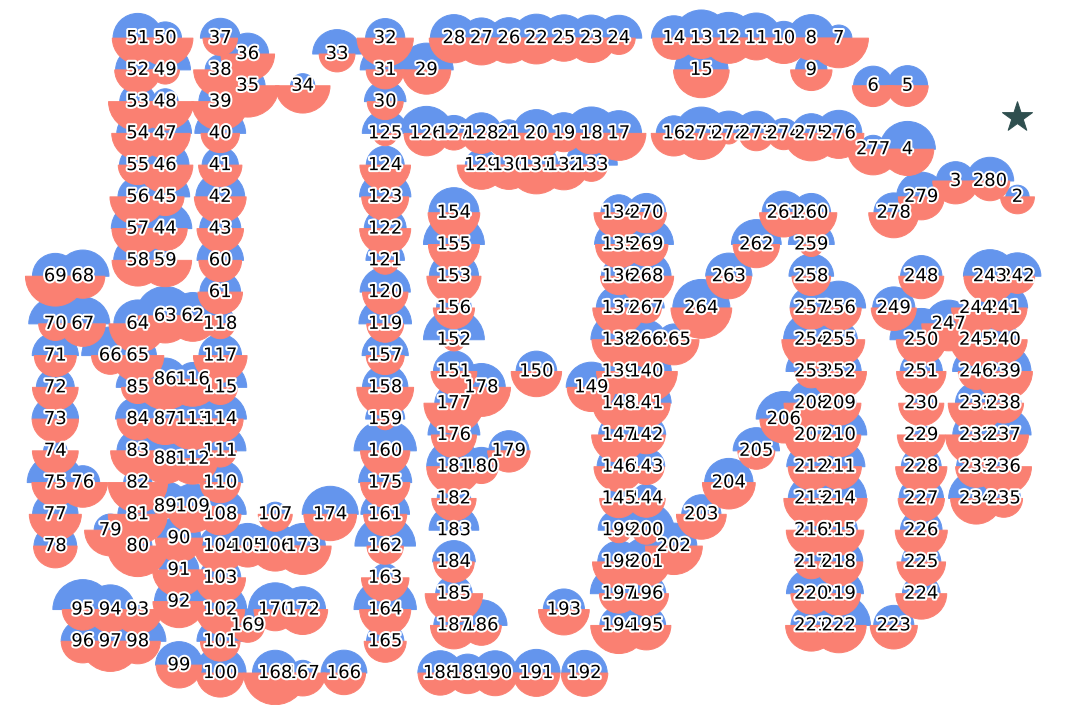

(<Figure size 1080x720 with 1 Axes>, <Axes: >)

In [24]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

problem = Problem(p.a280, 10, p.unc, 10)
with_route = [problem.nodes[i-1] for i in tour] + [problem.nodes[0]]
# with_route = []

def circle_city(p: Problem):
    node = p.nodes[37]
    # plt.scatter(node.x, node.y, edgecolors='mediumseagreen', marker='o', facecolor='none', s=8000, linewidths=7, linestyle='--')
    plt.scatter(node.x, node.y, facecolors='darkslategray', marker='*', s=3000, zorder=10, path_effects=[pe.withStroke(linewidth=10, foreground='w')])

# problem.plot(savefile=True, figsize=(15, 10), show_index=True, show_items=False, with_route=with_route, run_after=None)
problem.plot()

429258.0439072617

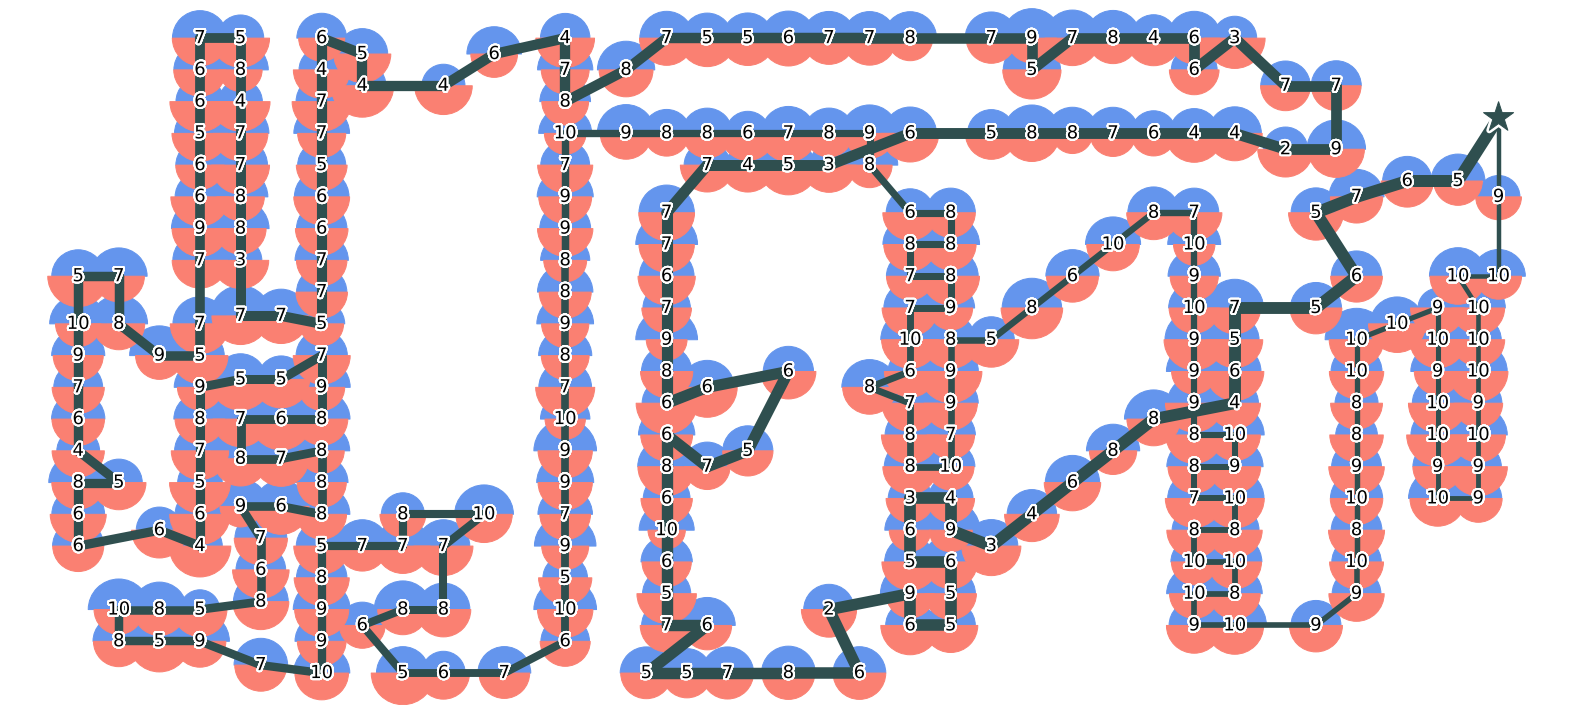

In [25]:
solution = Solution.from_filename(problem,
                                  '../submission.gecco/a280_n2790_uncorr_10.ttp.flns.1687321734794')
solution.plot().fitness()

19568.299050593814

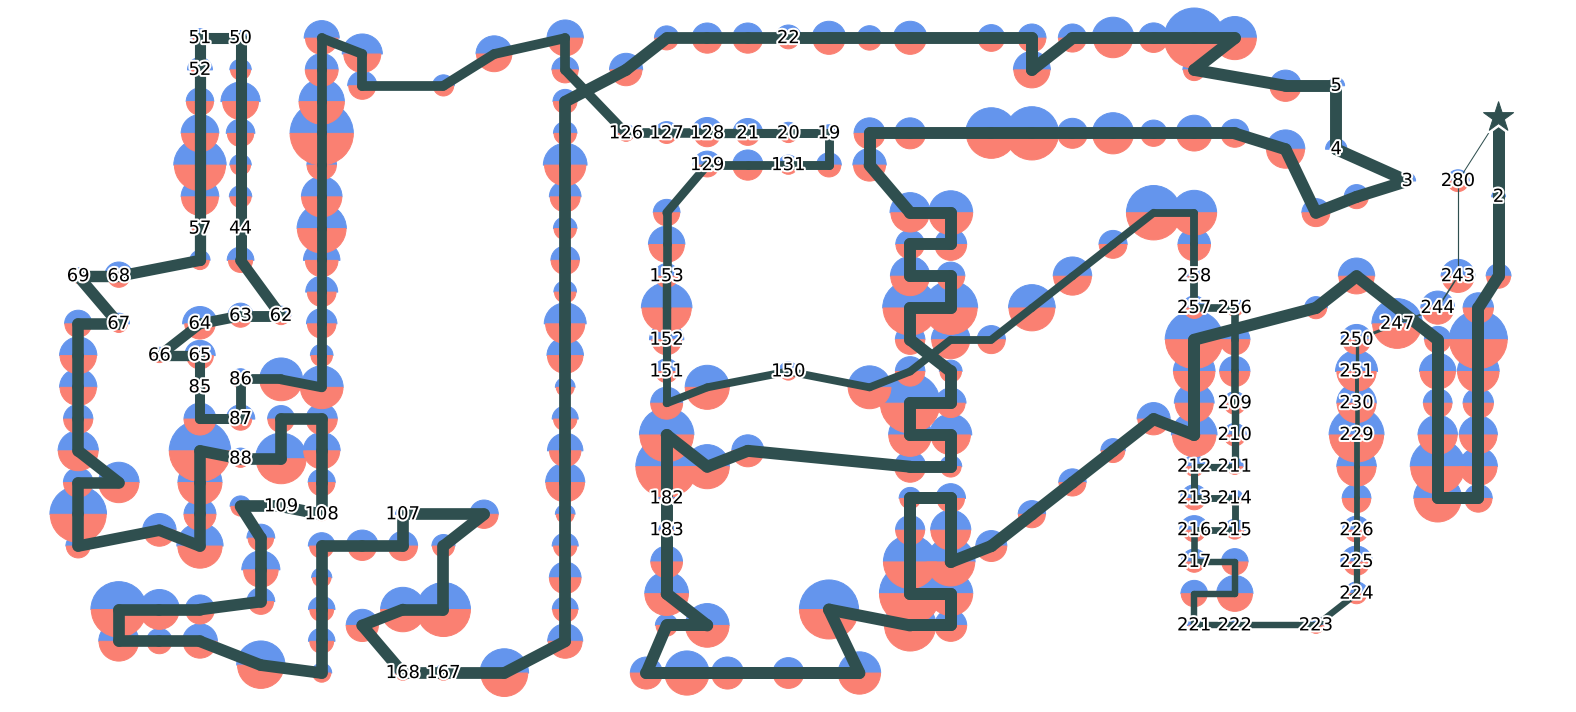

In [14]:
solution = Solution.from_filename(problem,
                                  '../results.gecco/a280_n')
solution.plot().fitness()

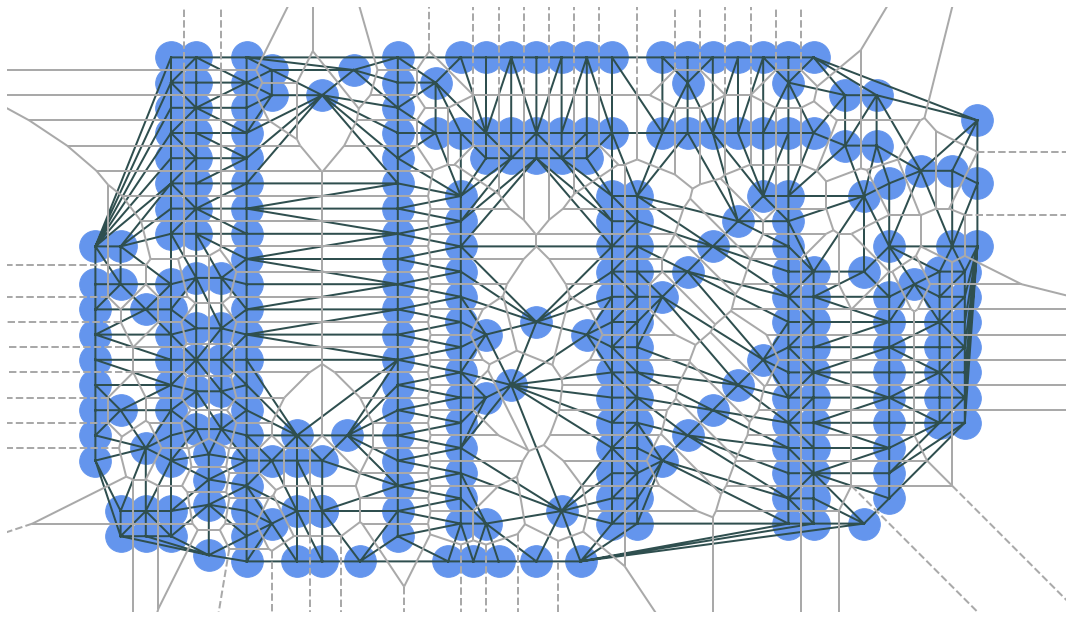

In [19]:
problem.plot_voronoi()

In [5]:
from ortools.algorithms.python import knapsack_solver

values = [int(i.profit) for i in problem.items]
weights = [[int(i.weight) for i in problem.items]]
capacities = [int(problem.capacity_of_knapsack)]
solver = knapsack_solver.KnapsackSolver(
    knapsack_solver.SolverType.KNAPSACK_MULTIDIMENSION_BRANCH_AND_BOUND_SOLVER,
    "KnapsackExample",
)

solver.init(values, weights, capacities)
computed_value = solver.solve()

packed_items = []
packed_weights = []
total_weight = 0
print("Total value =", computed_value)
for i in range(len(values)):
    if solver.best_solution_contains(i):
        packed_items.append(i)
        packed_weights.append(weights[0][i])
        total_weight += weights[0][i]
print("Total weight:", total_weight)
print("Packed items:", packed_items)
print("Packed_weights:", packed_weights)

Total value = 8028
Total weight: 2189
Packed items: [0, 2, 6, 11, 14, 16, 17, 20, 22, 29, 32, 35]
Packed_weights: [1, 367, 122, 325, 123, 305, 47, 247, 100, 281, 240, 31]


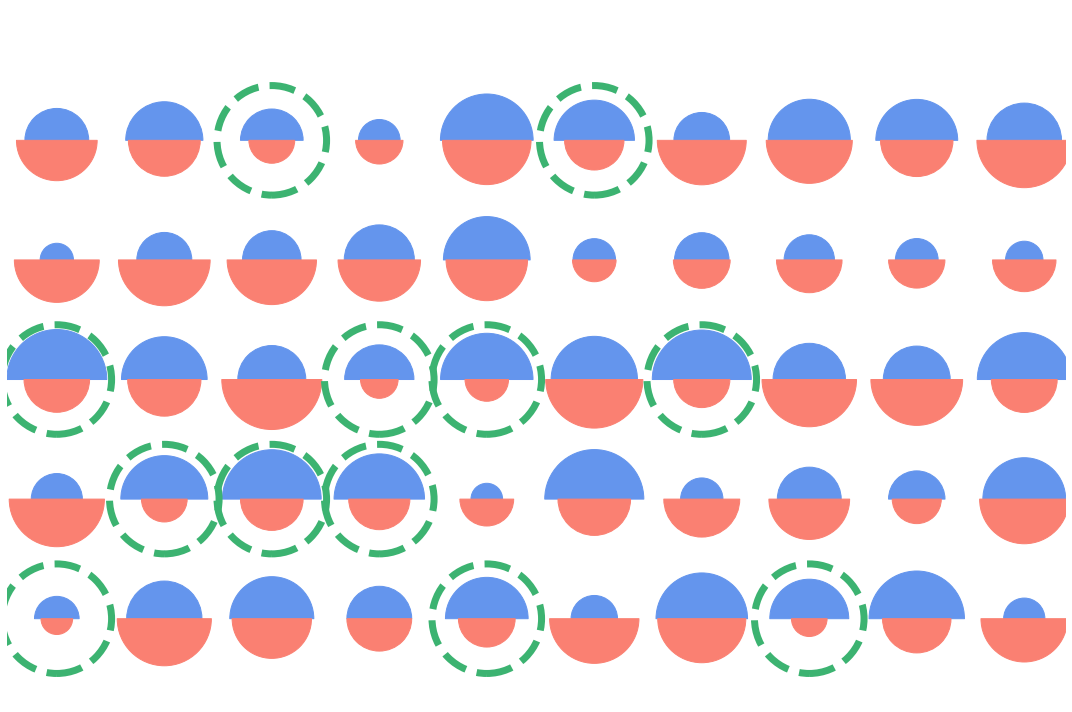

(<Figure size 1080x720 with 1 Axes>, <Axes: >)

In [6]:
problem = Problem(p.eil51, 1, p.unc, 1)
figsize = None
figsize = (15, 10)
problem.plot_ks(savefile=True, figsize=figsize, normalize_by=(1000, 10000), show_index=False, with_items=packed_items)

2871.364574103475

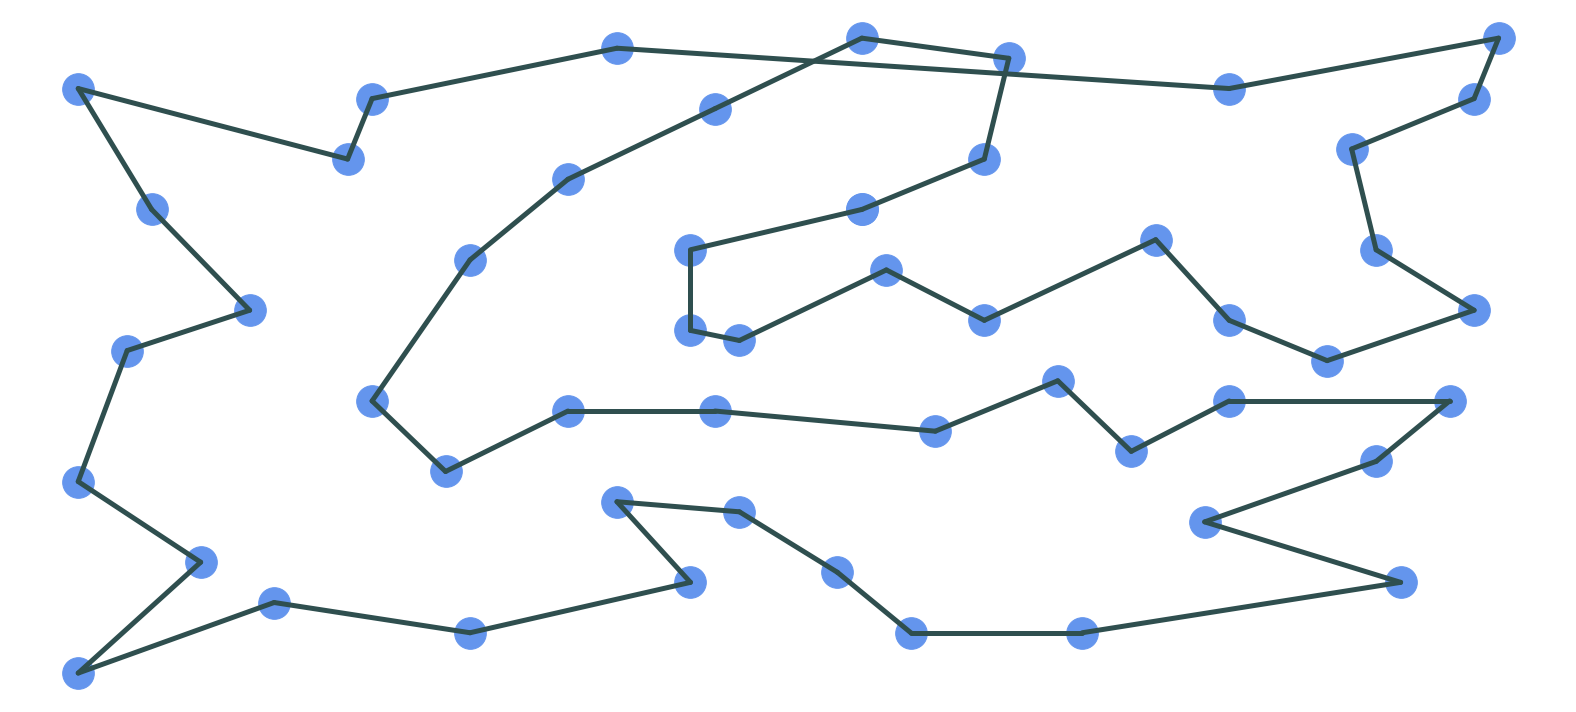

In [244]:
# solution.plot_route()
line_width = 5
solution.plot(show_index=None, show_items=False, min_line_width=line_width, max_line_width=line_width).fitness()

[10, 8, 48, 4, 15]


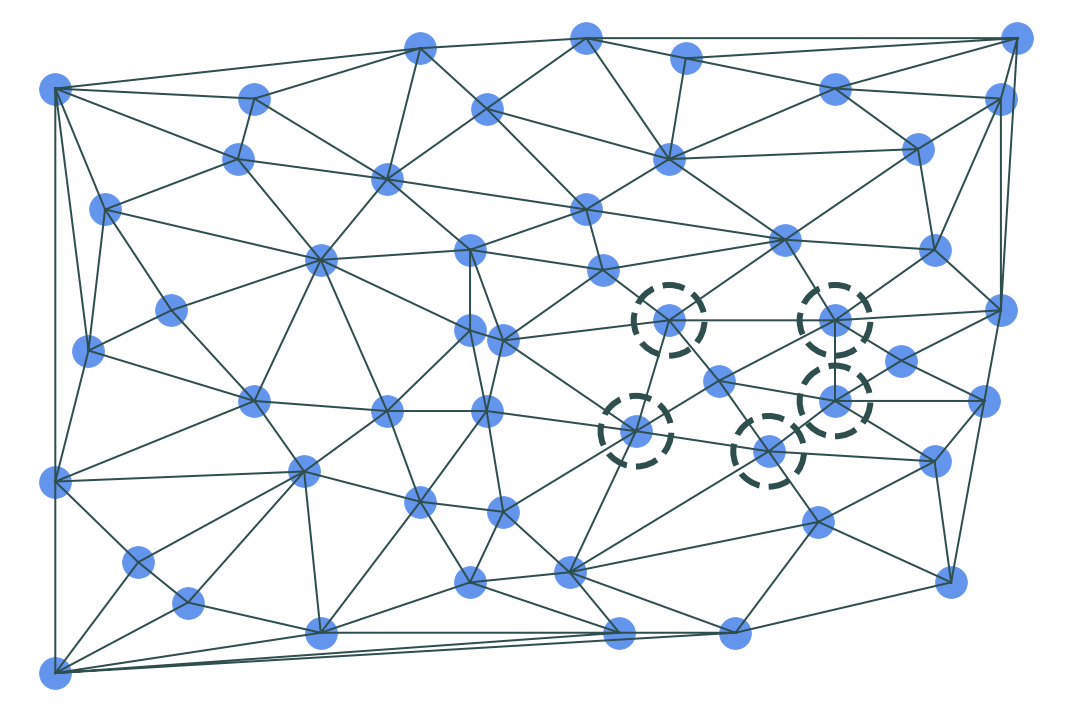

In [236]:
def choose_neighbors(p: Problem):
    # circle_city(p)
    delaunay = p.get_delaunay()
    adj = [p.nodes[a] for a in delaunay[37]]
    ax = [n.x for n in adj]
    ay = [n.y for n in adj]
    # for a in delaunay[37]:
    #     print(a)
    # print(delaunay[37])
    plt.scatter(ax, ay, edgecolors='darkslategrey', marker='o', facecolor='none', s=5000, linewidths=6, linestyle='--')

    # def flatten(xss):
    #     return list(set([x for xs in xss for x in xs]))
    # bdj = flatten([delaunay[a.i] for a in adj])
    # bdj = [p.nodes[b] for b in bdj if p.nodes[b] not in adj and b != 37]
    # bx = [n.x for n in bdj]
    # by = [n.y for n in bdj]
    # plt.scatter(bx, by, edgecolors='darkslategrey', marker='o', facecolor='none', s=5000, linewidths=6, linestyle='--')

problem.plot_voronoi(figsize=(15, 10), save_at='/home/caios/figures/voronoi-delaunay.png', after_run=choose_neighbors)

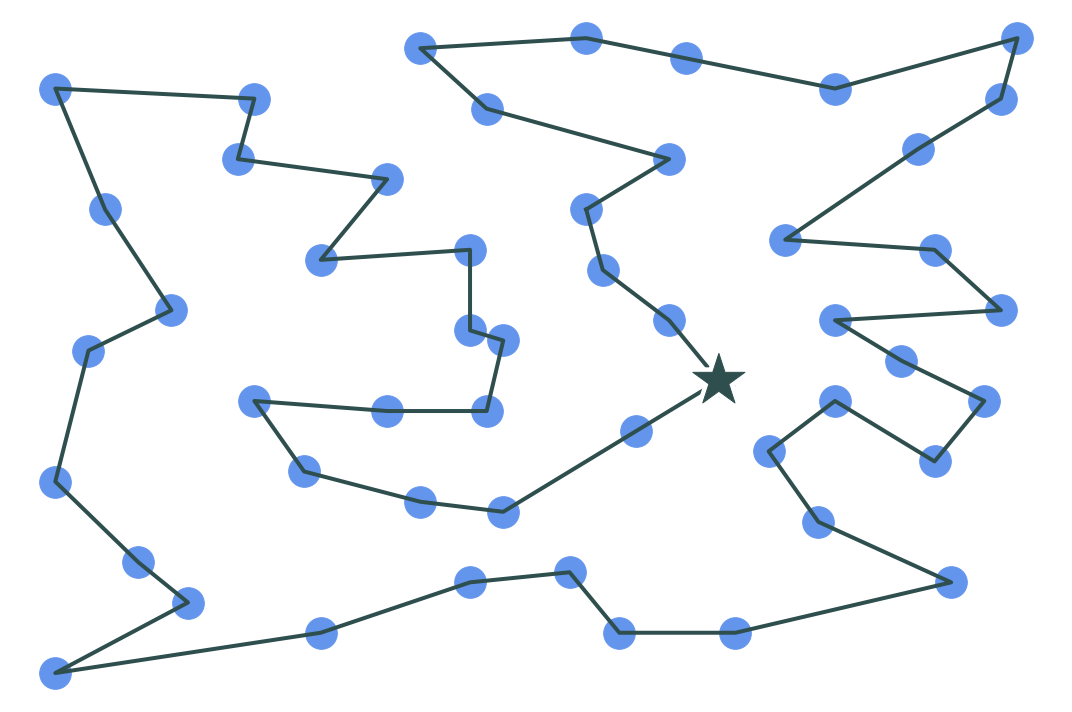

(<Figure size 1080x720 with 1 Axes>, <Axes: >)

In [246]:
problem.plot(savefile=True, figsize=(15, 10), show_index=False, show_items=False, with_route=with_route, run_after=circle_city)

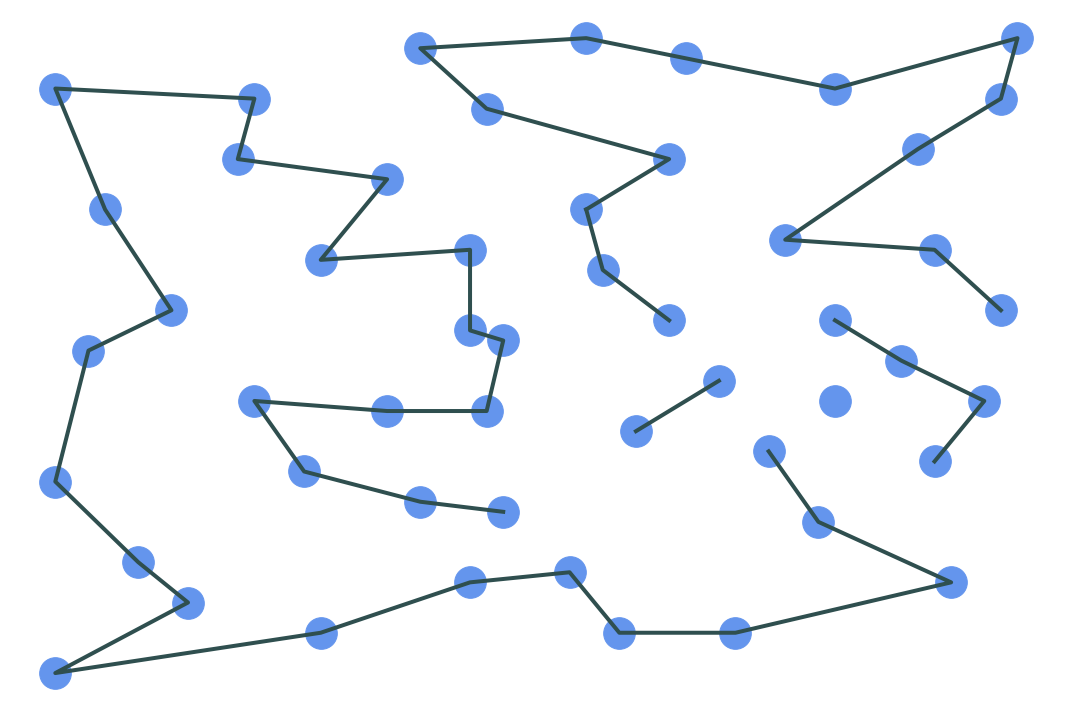

(<Figure size 1080x720 with 1 Axes>, <Axes: >)

In [237]:
with_routes = []
s = 0
index = 0
for x in with_route:
    if x.i in [10, 8, 48, 4, 15]:
        with_routes.append(with_route[s:index])
        s = index
    index += 1
with_routes.append(with_route[s:])

problem.plot(savefile=True, figsize=(15, 10), show_index=False, show_items=False, with_routes=with_routes, run_after=None)

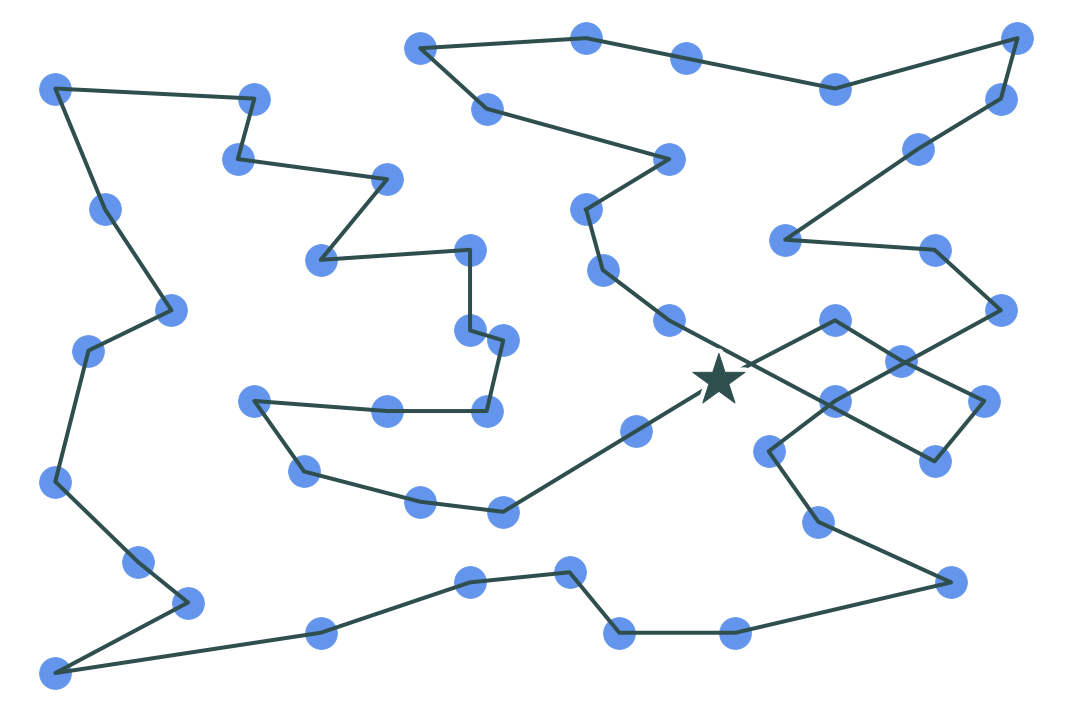

(<Figure size 1080x720 with 1 Axes>, <Axes: >)

In [248]:
import random
random.seed(2)

with_routes_random = list(with_routes)

end = with_routes_random.pop()
start = with_routes_random.pop(0)

random.shuffle(with_routes_random)

def flatten(xss):
    return [x for xs in xss for x in xs]

with_routes_random = flatten([start] + with_routes_random + [end])
problem.plot(savefile=True, figsize=(15, 10), show_index=False, show_items=False, with_route=with_routes_random, run_after=circle_city)

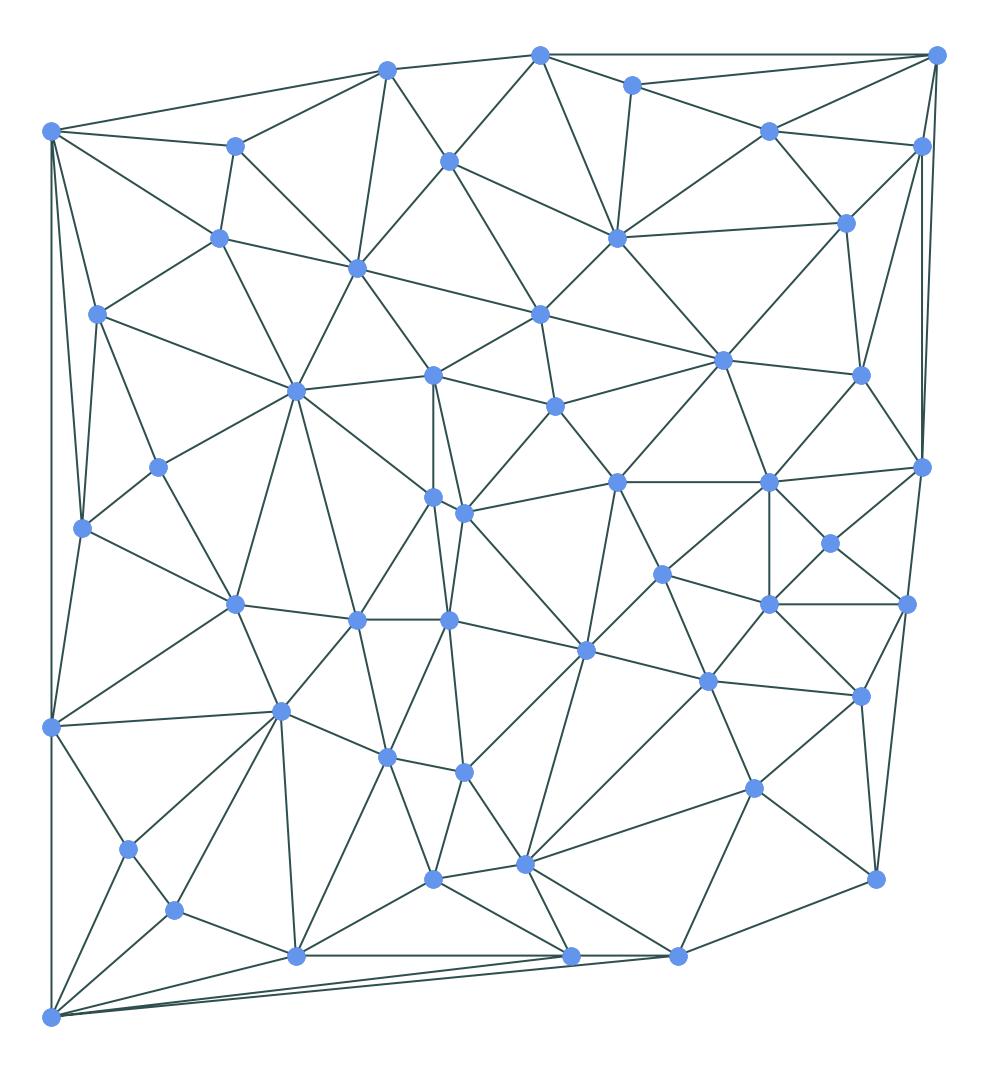

In [9]:
problem.plot_delaunay(save_at='/home/caios/figures/delaunay.pdf')